## Import Libraries

In [ ]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [ ]:
tweet_df = pd.read_csv('https://raw.githubusercontent.com/GigasTaufan/Indonesian-Hate-Speech-Classification/master/hate_speech_dataset.csv')
tweet_df.head()

,Label,Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...


Terdapat 2 kolom. Label dan Tweet. Kolom Label berisi kelas dari tweet. Kelas Non_HS menandakan bahwa tweet tersebut bukan termasuk kategori hate speech. Kelas HS menandakan bahwa tweet tersebut termasuk kategori hate speech.

In [ ]:
# contoh tweet Non_HS
tweet_df[tweet_df['Label']=='Non_HS'].head()

,Label,Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...


In [ ]:
tweet_df['Tweet'][0]

'RT @spardaxyz: Fadli Zon Minta Mendagri Segera Menonaktifkan Ahok Jadi Gubernur DKI https:\\/\\/t.co\\/KH5vIRwPdO'

In [ ]:
# contoh tweet HS
tweet_df[tweet_df['Label']=='HS'].head()

,Label,Tweet
453,HS,"Ini pasti salah Jokowi, Ahok dan kafir-kafir a..."
454,HS,@fahmiabuazzam1 biar aja biar tai nya kena bap...
455,HS,RT @BungWinar: Angin memporakporandakan basis ...
456,HS,"RT @Lupuz0503: Prestasi Ahok, \nSelain mjadi m..."
457,HS,Ulama Kompak Nyatakan #HaramPemimpinKafir Pili...


In [ ]:
tweet_df['Tweet'][453]

'Ini pasti salah Jokowi, Ahok dan kafir-kafir ateis. https:\\/\\/t.co\\/v2GRcUeStI'

In [ ]:
# check missing values
tweet_df.isnull().sum().sort_values(ascending=False)

Tweet    0
Label    0
dtype: int64

Tidak ada missing values

## Class Distribution

Non_HS    453
HS        260
Name: Label, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


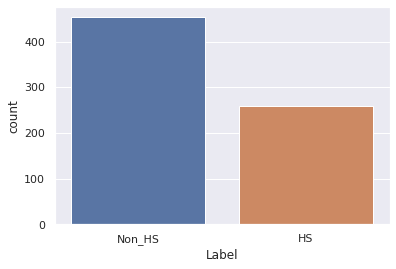

In [ ]:
print(tweet_df['Label'].value_counts())
print('\n')
print(sns.countplot(tweet_df['Label']))

Jumlah kelas Non_HS lebih banyak dari jumlah kelas HS

In [ ]:
jum_Non_HS = tweet_df[tweet_df['Label']=='Non_HS']['Label'].count()
jum_HS = tweet_df[tweet_df['Label']=='HS']['Label'].count()

percent_Non_HS = (jum_Non_HS/(jum_Non_HS+jum_HS)*100)
percent_HS= (jum_HS/(jum_Non_HS+jum_Non_HS))*100
print(percent_Non_HS)
print(percent_HS)

63.5343618513324
28.697571743929362


In [ ]:
# info dataset
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   713 non-null    object
 1   Tweet   713 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


In [ ]:
# describe dataset
tweet_df.describe()

,Label,Tweet
count,713,713
unique,2,703
top,Non_HS,jangan ada keberpihakan dalam badan hukum kare...
freq,453,2


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8d46d6080>,
      dtype=object)

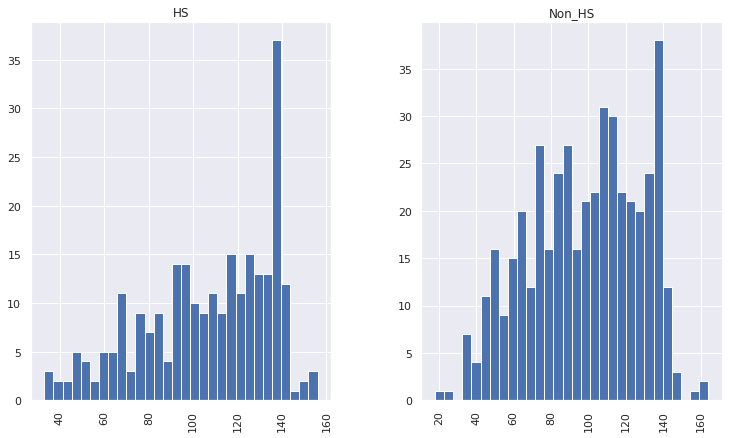

In [ ]:
tweet_df['length'] = tweet_df['Tweet'].apply(len)
tweet_df.hist(column='length', by='Label', bins=30, figsize=(12,7))

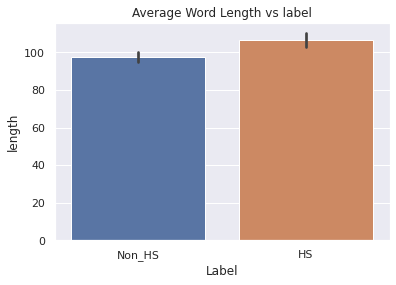

In [ ]:
fig1 = sns.barplot(x='Label',y='length',data = tweet_df)
plt.title('Average Word Length vs label')
plot = fig1.get_figure()

## Preprocessing

In [ ]:
df =tweet_df.copy()

### Case Folding

In [ ]:
import re

In [ ]:
def case_folding(data):
  temp_tweet = []

  for tw in data:
    # removal of @name[mention]
    tw = re.sub(r"(?:\@|https?\://)\S+", "", tw)

    # removal of links[https://blabala.com]
    # tw = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", tw)
    tw = re.sub(r"http\S+", "", tw)

    # removal of new line
    tw = re.sub('\n', '', tw)

    # removal of RT
    tw = re.sub('RT', '', tw)

    # removal of punctuations and numbers
    tw = re.sub("[^a-zA-Z^']", " ", tw)
    tw = re.sub(" {2,}", " ", tw)

    # remove leading and trailing whitespace
    tw = tw.strip()

    # remove whitespace with a single space
    tw = re.sub(r'\s+', ' ', tw)

    # convert text to Lowercase
    tw = tw.lower();
    temp_tweet.append(tw)
  return temp_tweet

In [ ]:
df['Case_folded']=case_folding(df['Tweet'])
df.head()

,Label,Tweet,length,Case_folded
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada


### Tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def tokenized(data):
  return data.apply(nltk.word_tokenize)

In [ ]:
df['Tokenized']=tokenized(df['Case_folded'])
df.head()

,Label,Tweet,length,Case_folded,Tokenized
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...,"[fadli, zon, minta, mendagri, segera, menonakt..."
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...,"[mereka, terus, melukai, aksi, dalam, rangka, ..."
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker..."
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada,"[waspada, ktp, palsu, kawal, pilkada]"


### Stemming

In [ ]:
!pip install Sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
def stemming(data):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  return [stemmer.stem(tweet) for tweet in data]

In [ ]:
df['Stemmed'] = df['Tokenized'].apply(stemming)
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...,"[fadli, zon, minta, mendagri, segera, menonakt...","[fadli, zon, minta, mendagri, segera, nonaktif..."
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...,"[mereka, terus, melukai, aksi, dalam, rangka, ...","[mereka, terus, luka, aksi, dalam, rangka, pen..."
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per..."
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tak, puas, debat, pilkada, masa..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada,"[waspada, ktp, palsu, kawal, pilkada]","[waspada, ktp, palsu, kawal, pilkada]"


### Slang Words Removal

In [ ]:
import requests

In [ ]:
slang_word = requests.get('https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt').text
dict_slang = eval(slang_word)

In [ ]:
dict_slang.items()

dict_items([('@', 'di'), ('abis', 'habis'), ('ad', 'ada'), ('adlh', 'adalah'), ('afaik', 'as far as i know'), ('ahaha', 'haha'), ('aj', 'saja'), ('ajep-ajep', 'dunia gemerlap'), ('ak', 'saya'), ('akika', 'aku'), ('akkoh', 'aku'), ('akuwh', 'aku'), ('alay', 'norak'), ('alow', 'halo'), ('ambilin', 'ambilkan'), ('ancur', 'hancur'), ('anjrit', 'anjing'), ('anter', 'antar'), ('ap2', 'apa-apa'), ('apasih', 'apa sih'), ('apes', 'sial'), ('aps', 'apa'), ('aq', 'saya'), ('aquwh', 'aku'), ('asbun', 'asal bunyi'), ('aseekk', 'asyik'), ('asekk', 'asyik'), ('asem', 'asam'), ('aspal', 'asli tetapi palsu'), ('astul', 'asal tulis'), ('ato', 'atau'), ('au ah', 'tidak mau tahu'), ('awak', 'saya'), ('ay', 'sayang'), ('ayank', 'sayang'), ('b4', 'sebelum'), ('bakalan', 'akan'), ('bandes', 'bantuan desa'), ('bangedh', 'banget'), ('banpol', 'bantuan polisi'), ('banpur', 'bantuan tempur'), ('basbang', 'basi'), ('bcanda', 'bercanda'), ('bdg', 'bandung'), ('begajulan', 'nakal'), ('beliin', 'belikan'), ('bencong

In [ ]:
slang_df = pd.DataFrame(dict_slang.items(), columns=['Old', 'New'])
slang_df.head()

,Old,New
0,@,di
1,abis,habis
2,ad,ada
3,adlh,adalah
4,afaik,as far as i know


In [ ]:
# remove trailing white space
slang_df['Old'] = slang_df['Old'].apply(lambda x: x.strip())
slang_df['New'] = slang_df['New'].apply(lambda x: x.strip())

In [ ]:
# transform into key value in a dict
slang_dict = {}
for i, row in slang_df.iterrows():
  slang_dict.update({row['Old']: row['New']})

In [ ]:
def removeSlang(data):
  # iterate through data
  for i, word in enumerate(data):
    # check if data in slang dictionary or not
    try:
      data[i] = slang_dict[word]
    # if data is not slang then pass
    except KeyError:
      pass
  return data

In [ ]:
df['No_Slang'] = df['Stemmed'].apply(removeSlang)
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...,"[fadli, zon, minta, mendagri, segera, menonakt...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, minta, mendagri, segera, nonaktif..."
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...,"[mereka, terus, melukai, aksi, dalam, rangka, ...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[mereka, terus, luka, aksi, dalam, rangka, pen..."
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, bagaimana, gurbernur, laku, keras, per..."
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, tidak, puas, debat, pemilihan k..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada,"[waspada, ktp, palsu, kawal, pilkada]","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ..."


### Stop Words Removal

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def removeStopWords(data):
  stop_words = set(stopwords.words('indonesian'))
  return data.apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
df['No_Stop']=removeStopWords(df['No_Slang'])
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...,"[fadli, zon, minta, mendagri, segera, menonakt...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, mendagri, nonaktif, ahok, gubernu..."
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...,"[mereka, terus, melukai, aksi, dalam, rangka, ...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[luka, aksi, rangka, penjara, ahok, ahok, gaga..."
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, gurbernur, laku, keras, perempuan, buk..."
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, puas, debat, pemilihan kepala d..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada,"[waspada, ktp, palsu, kawal, pilkada]","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ..."


## Encoding Target Value

In [ ]:
df['Label'] = df['Label'].apply(lambda x: 1 if x == 'HS' else 0)
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...,"[fadli, zon, minta, mendagri, segera, menonakt...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, mendagri, nonaktif, ahok, gubernu..."
1,0,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...,"[mereka, terus, melukai, aksi, dalam, rangka, ...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[luka, aksi, rangka, penjara, ahok, ahok, gaga..."
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, gurbernur, laku, keras, perempuan, buk..."
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, puas, debat, pemilihan kepala d..."
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada,"[waspada, ktp, palsu, kawal, pilkada]","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ..."


In [ ]:
# combine cleaned text after removing stop words into one string
df['Ready'] = df['No_Stop'].apply(lambda x: ' '.join(x))
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop,Ready
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...,"[fadli, zon, minta, mendagri, segera, menonakt...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, mendagri, nonaktif, ahok, gubernu...",fadli zon mendagri nonaktif ahok gubernur dki
1,0,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...,"[mereka, terus, melukai, aksi, dalam, rangka, ...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[luka, aksi, rangka, penjara, ahok, ahok, gaga...",luka aksi rangka penjara ahok ahok gagal pemil...
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, gurbernur, laku, keras, perempuan, buk...",sylvi gurbernur laku keras perempuan bukti fot...
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, puas, debat, pemilihan kepala d...",ahmad dhani puas debat pemilihan kepala daerah...
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada,"[waspada, ktp, palsu, kawal, pilkada]","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ...",waspada ktp palsu kawal pemilihan kepala daerah


## Combine Cleaned Tweet and Label

In [ ]:
data1 = df[['Ready']]
data2 = df[['Label']]
dataset = pd.concat([data1, data2], axis=1)
dataset.head()

,Ready,Label
0,fadli zon mendagri nonaktif ahok gubernur dki,0
1,luka aksi rangka penjara ahok ahok gagal pemil...,0
2,sylvi gurbernur laku keras perempuan bukti fot...,0
3,ahmad dhani puas debat pemilihan kepala daerah...,0
4,waspada ktp palsu kawal pemilihan kepala daerah,0


## Text Vectorization (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X = dataset['Ready']
label = dataset['Label']

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(X)
tfidf_vector.shape

(713, 1951)

## Dealing With Imbalance Class

In [ ]:
# from imblearn.over_sampling import SMOTE

In [ ]:
# sampler = SMOTE()
# tfidf_vector, label = sampler.fit_resample(tfidf_vector, label)
# print(tfidf_vector.shape)
# print(label.shape)

## Split Data (Training and Testing Data)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, label, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(570, 1951)
(143, 1951)
(570,)
(143,)


## Most Common Words VS Importants Words

In [ ]:
feature_names = np.array(tfidf_vectorizer.get_feature_names())

# Sort TFIDF by value
max_tf_idfs = X_train.max(0).toarray()[0] # Get largest tfidf values across all documents.
sorted_tf_idxs = max_tf_idfs.argsort() # Sorted indices
sorted_tf_idfs = max_tf_idfs[sorted_tf_idxs] # Sorted TFIDF values

# feature_names doesn't need to be sorted! You just access it with a list of sorted indices!
smallest_tf_idfs = pd.Series(sorted_tf_idfs[:10], index=feature_names[sorted_tf_idxs[:10]])                    
largest_tf_idfs = pd.Series(sorted_tf_idfs[-10:][::-1], index=feature_names[sorted_tf_idxs[-10:][::-1]])

In [ ]:
print('Most common words:\n', smallest_tf_idfs)
print('\n')
print('Most important words:\n', largest_tf_idfs)

Most common words:
 baiat     0.0
wahabi    0.0
kader     0.0
bangke    0.0
long      0.0
norak     0.0
denger    0.0
kah       0.0
vs        0.0
nomer     0.0
dtype: float64


Most important words:
 perempuan    0.969216
tangguh      0.960130
karya        0.955319
keren        0.947947
seru         0.910673
dukung       0.888721
nang         0.878559
kesi         0.868267
mantap       0.867034
paslon       0.844473
dtype: float64


##WordCloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

### Hate Speech Wordcloud

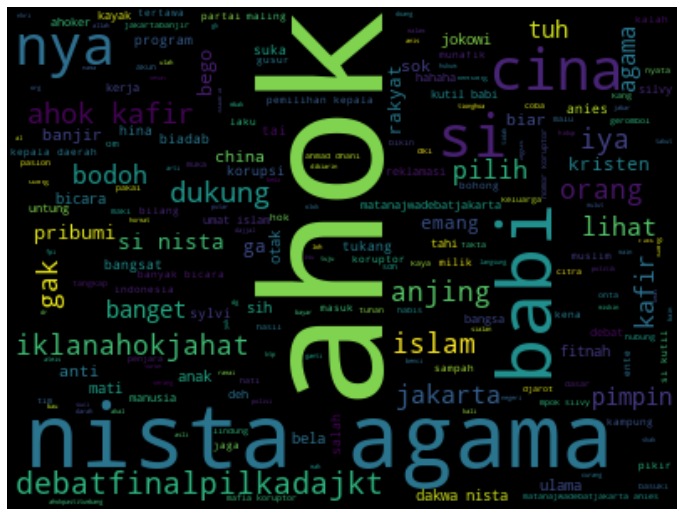

In [ ]:
hs_words = ' '.join([word for word in dataset['Ready'][dataset['Label']==1]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(hs_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Non Hate Speech Wordcloud

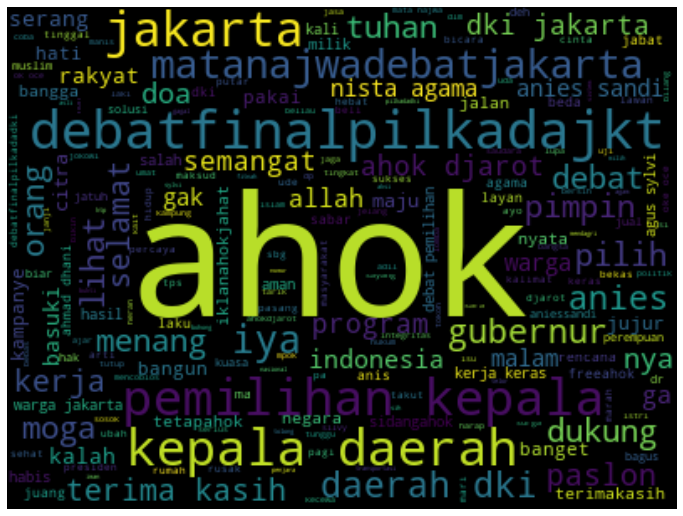

In [ ]:
nonhs_words = ' '.join([word for word in dataset['Ready'][dataset['Label']==0]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(nonhs_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Modelling

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

In [ ]:
def print_conf(y_test, result, classes, title='Confusion matrix'):
  conf_matrix = metrics.confusion_matrix(y_test, result)
  plt.figure(figsize=(6,6))
  sns.heatmap(conf_matrix, 
              annot=True,
              xticklabels=classes, 
              yticklabels=classes,
              cmap="Blues",
              fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(title)
  plt.show()

### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train) #training svc model
y_pred_svc = svc.predict(X_test) # predicting test data

In [ ]:
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.9842105263157894
0.8601398601398601


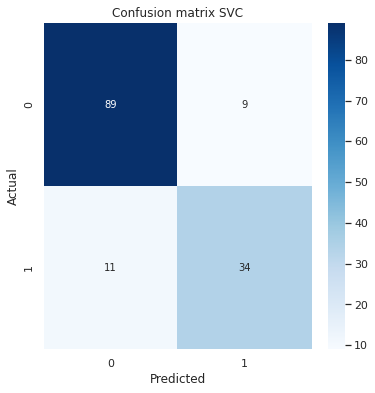

In [ ]:
print_conf(y_test, y_pred_svc, [0, 1], title="Confusion matrix SVC")

In [ ]:
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        98
           1       0.79      0.76      0.77        45

    accuracy                           0.86       143
   macro avg       0.84      0.83      0.84       143
weighted avg       0.86      0.86      0.86       143



### XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train) #training svc model
y_pred_xgb = xgb.predict(X_test) # predicting test data

In [ ]:
print(xgb.score(X_train, y_train))
print(xgb.score(X_test, y_test))

0.8947368421052632
0.8811188811188811


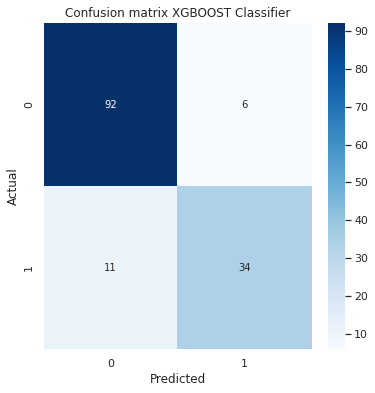

In [ ]:
print_conf(y_test, y_pred_xgb, [0, 1], title="Confusion matrix XGBOOST Classifier")

In [ ]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        98
           1       0.85      0.76      0.80        45

    accuracy                           0.88       143
   macro avg       0.87      0.85      0.86       143
weighted avg       0.88      0.88      0.88       143



#### XGBOOOST - RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {'learning_rate': [0.025, 0.05, 0.075, 0.1], #so called `eta` value
          'max_depth': [6, 7, 8],
          'min_child_weight': [i for i in range(1, 11, 2)],
          'n_estimators': [100, 250, 500] #number of trees, change it to 1000 for better results
}


In [ ]:
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='f1', n_jobs=-1, cv=5, verbose=3)

In [ ]:
random_search.fit(tfidf_vector, label)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   36.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='de

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search.best_params_

{'learning_rate': 0.05,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 250}

In [ ]:
xgb_rscv = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgb_rscv.fit(X_train, y_train) #training svc model
y_pred_xgb_rscv = xgb_rscv.predict(X_test) # predicting test data

In [ ]:
print(xgb_rscv.score(X_train, y_train))
print(xgb_rscv.score(X_test, y_test))

0.9473684210526315
0.8671328671328671


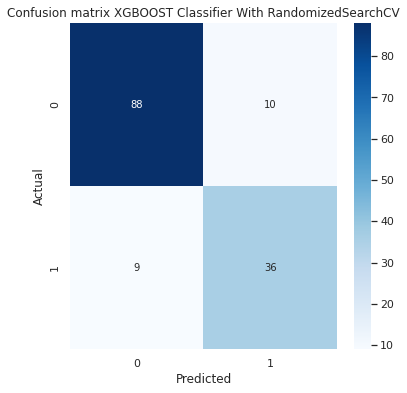

In [ ]:
print_conf(y_test, y_pred_xgb_rscv, [0, 1], title="Confusion matrix XGBOOST Classifier With RandomizedSearchCV")

## Model Comparison

In [ ]:
# Accuracy Comparison
models = ['SVM', 'XGBOOST', 'RandomSearchCV','Neural Network']
accSVMC = metrics.accuracy_score(y_test,y_pred_svc)
accXGB = metrics.accuracy_score(y_test, y_pred_xgb)
accXGB_RSCV = metrics.accuracy_score(y_test, y_pred_xgb_rscv)
accuracies = [accSVMC, accXGB, accXGB_RSCV]
comp = pd.DataFrame(list(zip(models, accuracies)), columns=['Model', 'Accuracy'])
comp

,Model,Accuracy
0,SVM,0.860140
1,XGBOOST,0.881119
2,RandomSearchCV,0.867133


In [ ]:
import joblib

# Saving model
joblib.dump(xgb, 'Hate Speech Classifier.joblib')
joblib.dump(tfidf_vectorizer, 'Hate Speech TF-IDF Vectorizer.joblib')

['Hate Speech TF-IDF Vectorizer.joblib']

In [ ]:
df['prediction'] = xgb.predict(tfidf_vectorizer.transform(df['Tweet']))
df['prediction'] = df['prediction'].apply(lambda x: 'HS' if x==1 else 'Non_HS')

# Save new dataframe into csv file
df.to_csv('Hate Speech Classification.csv', index=False)

df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop,Ready,prediction
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...,"[fadli, zon, minta, mendagri, segera, menonakt...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, mendagri, nonaktif, ahok, gubernu...",fadli zon mendagri nonaktif ahok gubernur dki,Non_HS
1,0,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...,"[mereka, terus, melukai, aksi, dalam, rangka, ...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[luka, aksi, rangka, penjara, ahok, ahok, gaga...",luka aksi rangka penjara ahok ahok gagal pemil...,Non_HS
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, gurbernur, laku, keras, perempuan, buk...",sylvi gurbernur laku keras perempuan bukti fot...,Non_HS
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, puas, debat, pemilihan kepala d...",ahmad dhani puas debat pemilihan kepala daerah...,Non_HS
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada,"[waspada, ktp, palsu, kawal, pilkada]","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ...",waspada ktp palsu kawal pemilihan kepala daerah,Non_HS


## Predict New Data

In [ ]:
input_tweet = ['dasar cina',
               'panda adalaha hewan dari babi']

def preProcessText(tweer):
    new_tweets = []
    for tw in texts:
        tw = case_folding(tw)
        tw = tokenized(tw)
        tw = stemming(tw)
        tw = removeSlang(tw)
        tw = removeStopWords(tw)
        tw = ' '.join(tw)
        new_tweets.append(tw)

    return new_tweets

def predictNewData(tweets):
    saved_model = joblib.load('Hate Speech Classifier.joblib') 
    saved_tfidf = joblib.load('Hate Speech TF-IDF Vectorizer.joblib')

    vectorized_tweets = saved_tfidf.transform(tweets)
    input_prediction = saved_model.predict(vectorized_tweets)

    for i in range(len(input_tweet)):
        if input_prediction[i]==1:
            print('Input text:\n', 
                input_tweet[i], 
                '\nPrediction: \nHate Speech!\n')
        else:
            print('Input text:\n', 
                input_tweet[i], 
                "\nPrediction: \nNot a Hate Speech.\n")
            
predictNewData(input_tweet)

Input text:
 dasar cina 
Prediction: 
Hate Speech!

Input text:
 panda adalaha hewan dari babi 
Prediction: 
Hate Speech!



# Stratified KFold CV

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [ ]:
train_scores = []
test_scores = []
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
for train_index, test_index in skf.split(tfidf_vector, label):
    X_train = tfidf_vector[train_index]
    X_test = tfidf_vector[test_index]
    y_train = label[train_index]
    y_test = label[test_index]

    #Train the model
    model.fit(X_train, y_train) #Training the model
    y_pred = model.predict(X_test)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    print(f"Accuracy for the fold no. {i} on the test set: {metrics.accuracy_score(y_test, y_pred)}, doublecheck: {model.score(X_test,y_test)}")
    print("precision: ", prec)
    print("recall: ", rec)
    print("f1: ", f1)
    print('\n')

    train_yhat = model.predict(X_train)
    train_acc = metrics.accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = metrics.accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress

Accuracy for the fold no. 1017 on the test set: 0.7832167832167832, doublecheck: 0.7832167832167832
precision:  0.7142857142857143
recall:  0.6730769230769231
f1:  0.6930693069306932


Accuracy for the fold no. 1017 on the test set: 0.7202797202797203, doublecheck: 0.7202797202797203
precision:  0.6578947368421053
recall:  0.4807692307692308
f1:  0.5555555555555556


Accuracy for the fold no. 1017 on the test set: 0.8111888111888111, doublecheck: 0.8111888111888111
precision:  0.7659574468085106
recall:  0.6923076923076923
f1:  0.7272727272727273


Accuracy for the fold no. 1017 on the test set: 0.8661971830985915, doublecheck: 0.8661971830985915
precision:  0.9714285714285714
recall:  0.6538461538461539
f1:  0.7816091954022988


Accuracy for the fold no. 1017 on the test set: 0.8732394366197183, doublecheck: 0.8732394366197183
precision:  0.9722222222222222
recall:  0.6730769230769231
f1:  0.7954545454545455




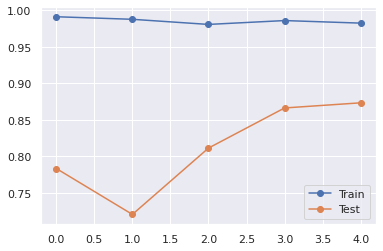

In [ ]:
plt.plot(train_scores, '-o', label='Train')
plt.plot(test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [ ]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9824868651488616
0.8732394366197183


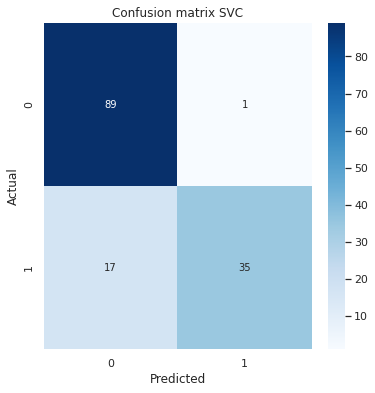

In [ ]:
print_conf(y_test, y_pred, [0, 1], title="Confusion matrix SVC")

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91        90
           1       0.97      0.67      0.80        52

    accuracy                           0.87       142
   macro avg       0.91      0.83      0.85       142
weighted avg       0.89      0.87      0.87       142

